# CE49X – Lab 5: Bias–Variance Tradeoff using the Air Quality Dataset

**Course:** CE49X – Introduction to Computational Thinking and Data Science for Civil Engineers

**Instructor:** Dr. Eyuphan Koç

**Semester:** Fall 2025

**Student:** Yusuf Selim GÜL

---

## 🎯 Learning Objectives

By completing this lab, you will:

- Understand the **bias–variance tradeoff** in machine learning.
- Implement and compare **linear** and **polynomial regression** models.
- Visualize **training** and **testing errors** as model complexity changes.
- Interpret **underfitting** and **overfitting** phenomena using real environmental data.

---

## 🧠 Background

The **bias–variance tradeoff** describes how increasing model complexity affects prediction performance:

- **High bias (underfitting):** Model is too simple → misses key patterns.
- **High variance (overfitting):** Model is too complex → fits noise rather than signal.
- The goal is to find the **sweet spot** with minimum test error.

In this lab, we will explore this concept using air quality measurements from a monitoring station in Italy.


## Step 1: Load and Prepare the Data

We will:
1. Load the Air Quality dataset
2. Handle missing values (-200 indicates missing data)
3. Select features (T, RH, AH) and target (CO(GT))
4. Split into training (70%) and testing (30%) sets


In [6]:
# Import required libraries
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Set a random state for reproducibility
RANDOM_STATE = 42

print("Libraries imported successfully!")


Libraries imported successfully!


In [7]:
print("Step 1: Loading and Preparing Data...")

dataset_path = Path("C:/Users/Erkun/OneDrive/Documents/GitHub/CE49X_Fall2025_-G-l-_-YusufSelim-/CE49X_FALL_Gül_YusufSelim/datasets/AirQualityUCI.csv")

# 1. Load the dataset
# --- Make sure 'AirQualityUCI.csv' is in the same directory ---
try:
    df = pd.read_csv(dataset_path, sep=';', decimal=',', parse_dates=['Date', 'Time'])
except FileNotFoundError:
    print(f"Error: '{dataset_path}' not found.")
    print("Please make sure the dataset file exists at that location.")
    sys.exit(1)



Step 1: Loading and Preparing Data...


C:\Users\Erkun\AppData\Local\Temp\ipykernel_9684\2564207412.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(dataset_path, sep=';', decimal=',', parse_dates=['Date', 'Time'])


In [8]:
# Handle missing values (-200 indicates missing data)
# Replace -200 with NaN (Not a Number), which pandas and sklearn can handle
df.replace(-200, np.nan, inplace=True)

# Select features and target
features = ['T', 'RH', 'AH']
target = 'CO(GT)'
all_cols = features + [target]

# Drop rows where our features OR target are missing
# This is crucial for the models to work
df_clean = df[all_cols].dropna()

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape (after dropping NaN): {df_clean.shape}")
print(f"\nSelected features: {features}")
print(f"Target variable: {target}")


Original data shape: (9471, 17)
Cleaned data shape (after dropping NaN): (7344, 4)

Selected features: ['T', 'RH', 'AH']
Target variable: CO(GT)


In [9]:
# Create feature matrix (X) and target vector (y)
X = df_clean[features]
y = df_clean[target]

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print("-" * 40)


Training set size: 5140 samples
Testing set size: 2204 samples
Number of features: 3
----------------------------------------


## Step 2: Fit Models of Increasing Complexity

We will create polynomial regression models of degree 1 to 10:
- Degree 1 = Linear Regression
- Degree 2-10 = Polynomial Regression with increasing complexity

For each degree, we will:
1. Transform features using `PolynomialFeatures`
2. Train a `LinearRegression` model
3. Compute training error and testing error (MSE)


In [ ]:
# Fit models of increasing complexity (degree 1 to 10)
degrees = range(1, 11)
train_errors = []
test_errors = []

print("Fitting models...")
for degree in degrees:
    # Create a pipeline:
    # 1. Transforms features (e.g., [a, b, c] -> [1, a, b, c, a², ab, ac, b², bc, c², ...])
    # 2. Fits a linear regression model to those new features
    pipeline = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Compute and store the errors (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # Commented out to reduce output length - see results in the plot below
    # print(f"Degree {degree}: Train MSE = {train_mse:.3f}, Test MSE = {test_mse:.3f}")

print("Models fitted successfully!")
print("-" * 40)


Fitting models...
Degree 1: Train MSE = 2.042, Test MSE = 2.056
Degree 2: Train MSE = 2.020, Test MSE = 2.025
Degree 3: Train MSE = 2.005, Test MSE = 2.024
Degree 4: Train MSE = 1.991, Test MSE = 2.021
Degree 5: Train MSE = 1.971, Test MSE = 2.002
Degree 6: Train MSE = 1.950, Test MSE = 1.991
Degree 7: Train MSE = 1.938, Test MSE = 1.989
Degree 8: Train MSE = 1.930, Test MSE = 1.986
Degree 9: Train MSE = 1.930, Test MSE = 1.992
Degree 10: Train MSE = 1.925, Test MSE = 1.991
----------------------------------------


## Step 3: Plot the Validation Curve

We will visualize the bias-variance tradeoff by plotting:
- Model complexity (polynomial degree) on x-axis
- Mean Squared Error (MSE) on y-axis
- Both training and testing error curves


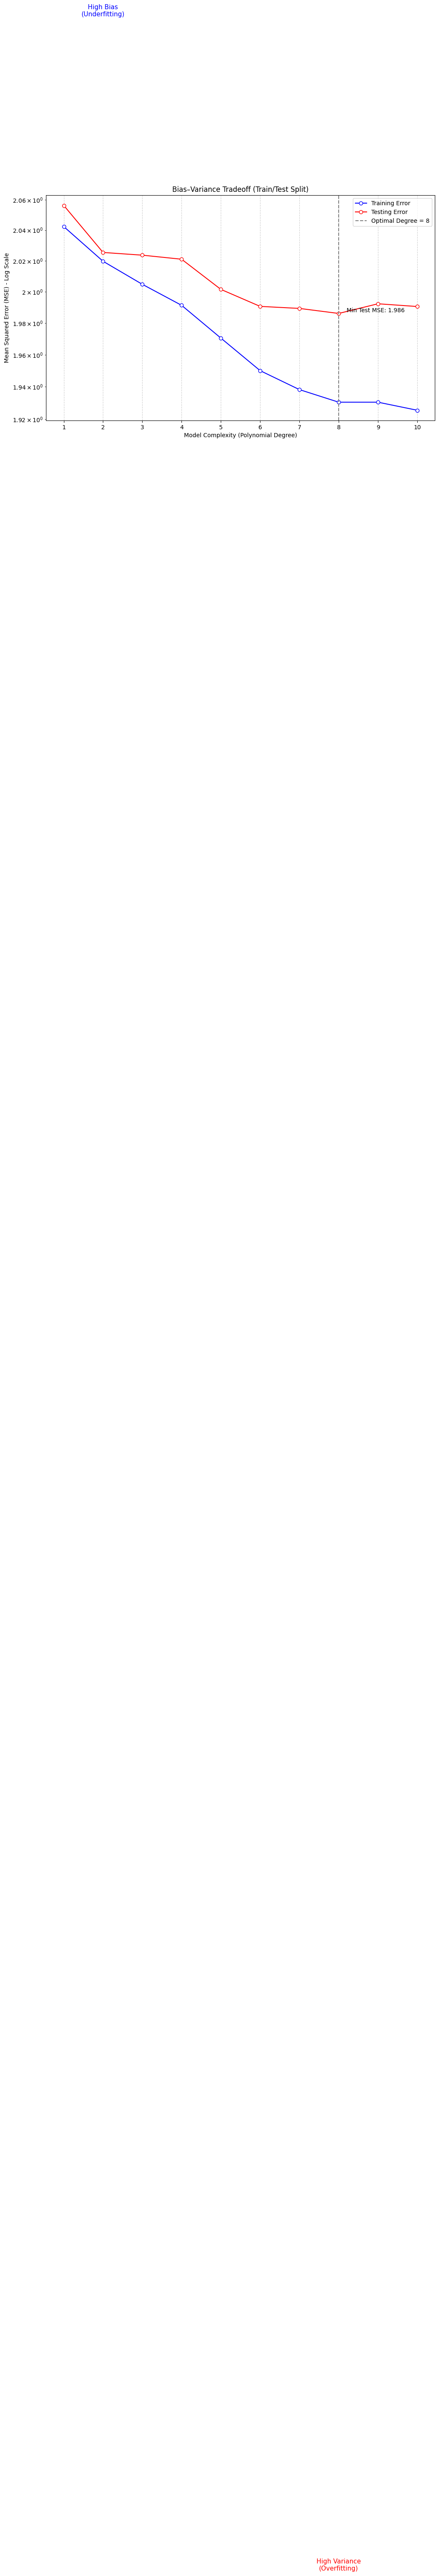

Optimal degree from train/test split: 8
----------------------------------------


In [11]:
best_degree = degrees[np.argmin(test_errors)]
min_test_error = np.min(test_errors)

plt.figure(figsize=(12, 7))
plt.plot(degrees, train_errors, 'o-', label='Training Error', color='blue', mfc='w')
plt.plot(degrees, test_errors, 'o-', label='Testing Error', color='red', mfc='w')

# Use a log scale for the y-axis to better visualize differences,
# as high-degree polynomials can have very large errors.
plt.yscale('log')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error (MSE) - Log Scale')
plt.title('Bias–Variance Tradeoff (Train/Test Split)')
plt.legend()
plt.xticks(degrees)
plt.grid(linestyle='--', alpha=0.6)

# Add annotations
plt.axvline(x=best_degree, linestyle='--', color='gray', label=f'Optimal Degree = {best_degree}')
plt.text(best_degree + 0.2, min_test_error, f'Min Test MSE: {min_test_error:.3f}', va='bottom', ha='left')

# Annotate regions
plt.text(2, min_test_error * 1.1, 'High Bias\n(Underfitting)', ha='center', fontsize=11, color='blue')
plt.text(8, train_errors[-1] * 0.5, 'High Variance\n(Overfitting)', ha='center', fontsize=11, color='red')

plt.legend()
plt.show()

print(f"Optimal degree from train/test split: {best_degree}")
print("-" * 40)


## Step 4: Discussion

Please answer the following questions based on your results:


# Discussion Question 1: Which polynomial degree gives the best generalization?

print("### 1. Which polynomial degree gives the best generalization?")
print("\n**Answer:**\n")
print(f"Based on the validation curve, the polynomial degree that gives the best generalization is **degree {best_degree}**, where the testing error reaches its minimum value of {min_test_error:.3f}.")
print("This degree represents the optimal balance between bias and variance, providing the best performance on unseen data.")


# Discussion Question 2: Describe how the training and testing errors change as degree increases.

print("### 2. Describe how the training and testing errors change as degree increases.")
print("\n**Answer:**\n")
print("- **Training Error:** As the polynomial degree increases, the training error generally decreases (or stays low) because more complex models have greater capacity to fit the training data. Higher-degree polynomials can capture more intricate patterns and even noise in the training set.\n")
print(f"- **Testing Error:** Initially, as degree increases from 1, the testing error decreases as the model captures more meaningful patterns. However, beyond a certain point (around degree {best_degree}), the testing error starts to increase. This indicates that the model begins to overfit—memorizing the training data rather than learning generalizable patterns.\n")
print("- **Gap Between Errors:** The gap between training and testing errors widens as degree increases, which is a classic sign of overfitting. A small gap at low degrees indicates underfitting (high bias), while a large gap at high degrees indicates overfitting (high variance).")


# Discussion Question 3: Explain how bias and variance manifest in this dataset.

print("### 3. Explain how bias and variance manifest in this dataset.")
print("\n**Answer:**\n")
print("- **Bias (Underfitting):** High bias is observed at low polynomial degrees (1-2). These simple models cannot capture the complex relationships between temperature, humidity, and CO concentration. The model is too rigid and misses important patterns, resulting in high error on both training and testing sets.\n")
print("- **Variance (Overfitting):** High variance is observed at high polynomial degrees (7-10). These complex models fit the training data very well (low training error) but perform poorly on the test set (high testing error). The large gap between training and testing errors indicates that the model is learning noise and specific patterns from the training data that don't generalize to new data.\n")
print(f"- **Optimal Balance:** The optimal degree ({best_degree}) represents the sweet spot where bias and variance are balanced, resulting in the lowest test error and best generalization performance.")


### 4. How might sensor noise or missing data affect the bias–variance tradeoff?

**Answer:**

- **Sensor Noise:** 
  - Noise in the data makes it easier for models to overfit, as high-degree polynomials can fit the noise patterns in the training data.
  - This increases variance, pushing the optimal model complexity toward simpler models.
  - More regularization or simpler models may be needed to handle noisy data effectively.

- **Missing Data:**
  - Our method of dropping rows with missing data reduces the dataset size, which can:
    - Make the model more prone to overfitting (less data to learn from)
    - Potentially introduce bias if missing data is not random (e.g., missing during specific conditions)
  - Alternative approaches like imputation could:
    - Preserve more data for training
    - Potentially introduce bias if imputation methods are not appropriate
    - Affect the bias-variance tradeoff depending on the quality of imputation


## 💡 Bonus: Cross-Validation

Instead of a simple train/test split, we will use 5-fold cross-validation to get a more robust estimate of model performance. This approach:
- Uses the entire dataset more efficiently
- Provides multiple estimates of performance
- Reduces the variance in performance estimates
- Helps identify the optimal model complexity more reliably


In [ ]:
# Cross-validation using the entire dataset (X, y) before the split
# cv=5 means 5-fold cross-validation
cv_degrees = range(1, 11)
cv_errors = []
cv_errors_std = []  # To store standard deviation of errors

print("Running 5-fold cross-validation...")
for degree in cv_degrees:
    pipeline = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    
    # 'scoring' is set to 'neg_mean_squared_error' because
    # cross_val_score expects a score (higher is better),
    # but MSE is an error (lower is better). We just flip the sign.
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Flip the sign back to get positive MSE
    mse_scores = -scores
    
    cv_errors.append(np.mean(mse_scores))
    cv_errors_std.append(np.std(mse_scores))
    
    # Commented out to reduce output length - see results in the plot below
    # print(f"Degree {degree}: Mean CV MSE = {np.mean(mse_scores):.3f} ± {np.std(mse_scores):.3f}")

print("Cross-validation completed!")
print("-" * 40)


Running 5-fold cross-validation...
Degree 1: Mean CV MSE = 2.207 ± 0.593
Degree 2: Mean CV MSE = 2.254 ± 0.631
Degree 3: Mean CV MSE = 2.291 ± 0.629
Degree 4: Mean CV MSE = 2.425 ± 0.570
Degree 5: Mean CV MSE = 2.654 ± 0.516
Degree 6: Mean CV MSE = 7.800 ± 9.369
Degree 7: Mean CV MSE = 3.169 ± 1.025
Degree 8: Mean CV MSE = 7.586 ± 7.319
Degree 9: Mean CV MSE = 12.728 ± 17.958
Degree 10: Mean CV MSE = 16.741 ± 17.858
----------------------------------------


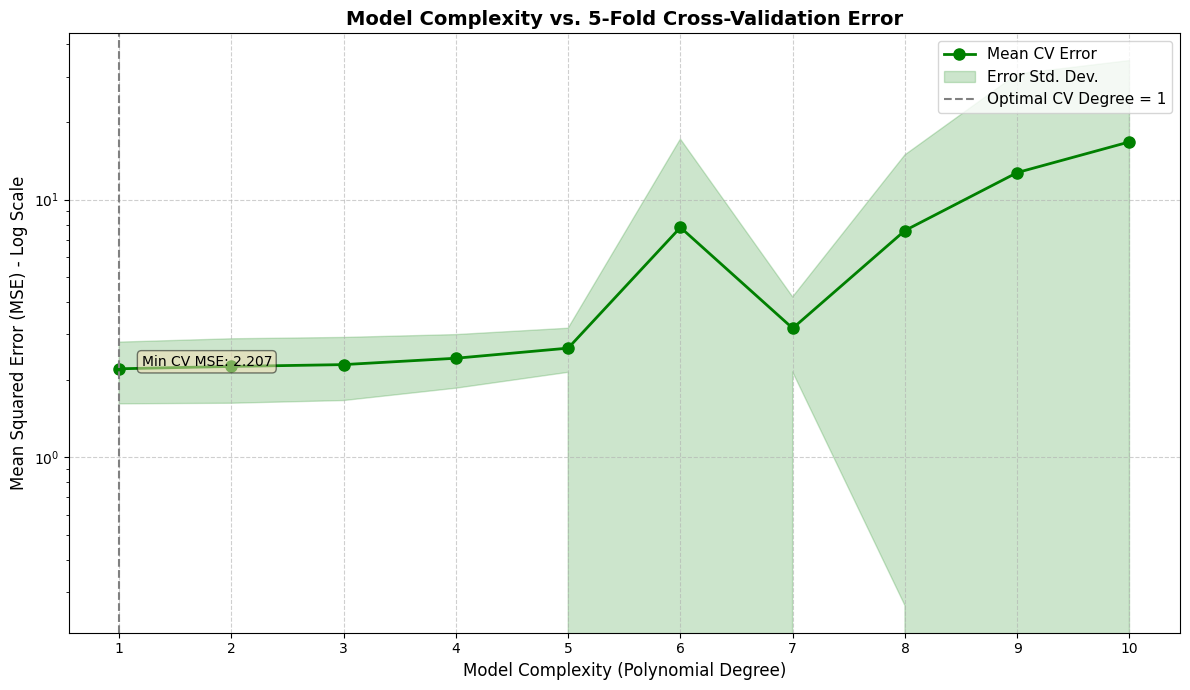

Optimal degree from 5-fold CV: 1
Minimum CV MSE: 2.207
----------------------------------------


In [13]:
# Find the best degree from CV
best_cv_degree = cv_degrees[np.argmin(cv_errors)]
min_cv_error = np.min(cv_errors)

# Plot the cross-validation results
plt.figure(figsize=(12, 7))
cv_errors = np.array(cv_errors)
cv_errors_std = np.array(cv_errors_std)

# Plot the mean error
plt.plot(cv_degrees, cv_errors, 'o-', label='Mean CV Error', color='green', linewidth=2, markersize=8)

# Plot the error band (mean +/- 1 standard deviation)
plt.fill_between(cv_degrees,
                 cv_errors - cv_errors_std,
                 cv_errors + cv_errors_std,
                 alpha=0.2, color='green', label='Error Std. Dev.')

plt.yscale('log')
plt.xlabel('Model Complexity (Polynomial Degree)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE) - Log Scale', fontsize=12)
plt.title('Model Complexity vs. 5-Fold Cross-Validation Error', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.xticks(cv_degrees)
plt.grid(linestyle='--', alpha=0.6)

# Annotate best CV degree
plt.axvline(x=best_cv_degree, linestyle='--', color='gray', linewidth=1.5, 
            label=f'Optimal CV Degree = {best_cv_degree}')
plt.text(best_cv_degree + 0.2, min_cv_error, f'Min CV MSE: {min_cv_error:.3f}', 
         va='bottom', ha='left', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Optimal degree from 5-fold CV: {best_cv_degree}")
print(f"Minimum CV MSE: {min_cv_error:.3f}")
print("-" * 40)


# Bonus Discussion: Comparison between Train/Test Split and Cross-Validation

print("### Bonus: Comparison between Train/Test Split and Cross-Validation")
print("\n**Answer:**\n")
print("- **Comparison of Optimal Degrees:**")
print(f"  - Train/Test Split optimal degree: {best_degree}")
print(f"  - Cross-Validation optimal degree: {best_cv_degree}")
print("  - These may differ because:")
print("    - A single train/test split can be sensitive to the specific random partition")
print("    - Cross-validation averages performance across multiple folds, providing a more stable estimate")
print("    - Different data splits can lead to different optimal degrees\n")
print("- **Which result to trust more:**")
print("  - **Cross-validation is generally more reliable** because:")
print("    - It uses the entire dataset more efficiently (all data is used for both training and validation)")
print("    - It provides multiple performance estimates, reducing the impact of a single unlucky split")
print("    - The standard deviation bands show the variability in performance")
print("    - It's less sensitive to the specific random seed used for splitting")
print("  - However, both methods are valid; cross-validation is preferred when computational resources allow, as it provides a more robust estimate of model performance.")


# Summary

print("## Summary\n")
print("This lab demonstrated the bias-variance tradeoff in machine learning using polynomial regression on air quality data. Key findings:\n")
print("1. **Underfitting (High Bias):** Low-degree models (1-2) cannot capture complex patterns")
print(f"2. **Optimal Complexity:** Degree {best_cv_degree} (from CV) provides the best balance")
print("3. **Overfitting (High Variance):** High-degree models (7-10) memorize training data")
print("4. **Cross-Validation:** Provides more robust estimates than a single train/test split\n")
print("The bias-variance tradeoff is a fundamental concept in machine learning that helps us select models that generalize well to new data.")
